# Module import

In [53]:
from netCDF4 import Dataset                             
import numpy as np                                      
from scipy import ndimage                               
import matplotlib.pyplot as plt                         
from matplotlib.patches import Rectangle                
import matplotlib as mpl                                
from matplotlib.offsetbox import AnchoredText           
import cartopy.crs as ccrs                              
import cartopy.feature as cfeature                   
import warnings
warnings.filterwarnings("ignore")

# Matplotlib parameterisation

In [54]:
plt.style.use('default')                               
plt.rcParams['figure.facecolor'] = 'white'

# Geodata

In [55]:
geodata = Dataset("../../data/geodata/lat_lon_v2.nc")
lons = geodata["lons_mid"][:]
lats = geodata["lats_mid"][:]

# Core data

In [56]:
file = "../../data/core/Convective_struct_extended_202502021115_000.nc"
data = Dataset(file, mode='r')

cores = data["cores"][:, :]
raw_cores = np.copy(cores)

Plat = data["Pmax_lat"][:]
Plon = data["Pmax_lon"][:]

Dakar_lon = -17.467686
Dakar_lat = 14.716677

In [57]:
#binary_cores = (cores != 0).astype(int)

In [58]:
locations = {
    "Lusaka": [-15.3875, 28.3228],
    "Ndola": [-12.9683, 28.6366],
    "Kasama": [-10.2129, 31.1808],
    "Chinsali": [-10.5500, 32.0667],
    "Kabwe": [-14.4469, 28.4464],
    "Livingstone": [-17.8419, 25.8542],
    "Mongu": [-15.2484, 23.1274],
    "Mansa": [-11.1996, 28.8943],
    "Solwezi": [-12.1722, 26.3981],
    "Chipata": [-13.6339, 32.6508]
}

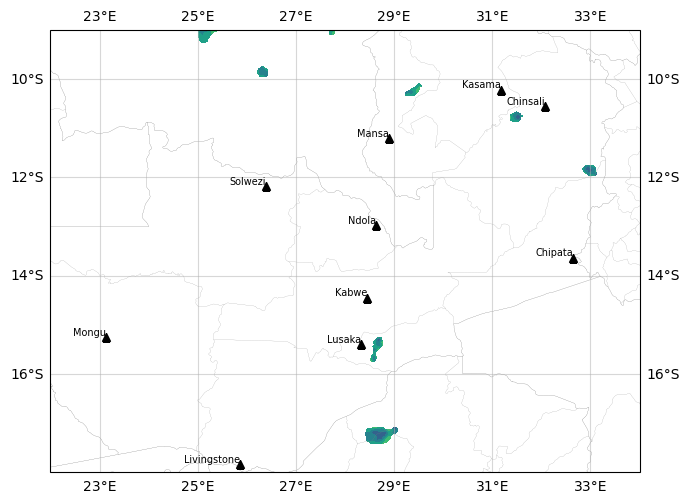

In [ ]:
# Define extent
extent = (22, 34, -18, -9)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 9), subplot_kw={'projection': ccrs.PlateCarree()})

# Force background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set map extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Force LAND to be white
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Optional

ax.gridlines(xlocs=np.array([23, 25, 27, 29, 31, 33]), 
                    ylocs=np.array([-16, -14, -12, -10]), 
                    draw_labels=True, 
                    crs=ccrs.PlateCarree(),                
                    alpha=0.5
            )

admin_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none'
    )

# Add administrative borders
admin_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none'
)
ax.add_feature(admin_borders, edgecolor='white', linewidth=0.07)

ax.add_feature(admin_borders, edgecolor='black', linewidth=0.06)

for name, (lat, lon) in locations.items():
  plt.plot(lon, lat, marker="^", color="black")
  ax.text(lon, lat, name, fontsize=7, transform=ccrs.PlateCarree(), ha='right', va='bottom', color='black', zorder=10)
  
contour_core = ax.contourf(lons, lats, cores, transform=ccrs.PlateCarree(), cmap="viridis")

plt.tight_layout()
plt.show()


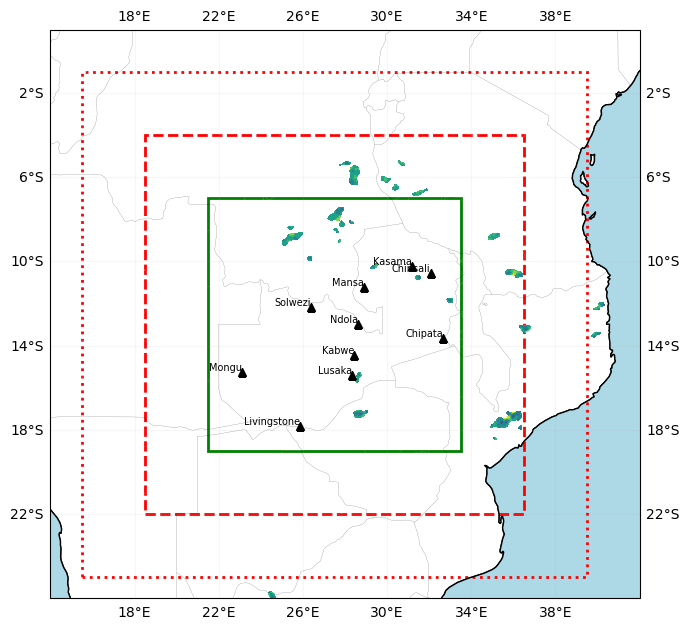

In [99]:
# Define extent
extent = (22-6-2, 34+6+2, -18-6-2, -9+6+2+2)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 9), subplot_kw={'projection': ccrs.PlateCarree()})

# Force background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set map extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Force LAND to be white
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Optional


admin_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none'
    )

# Add administrative borders
admin_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none'
)
ax.add_feature(admin_borders, edgecolor='white', linewidth=0.07)

ax.add_patch(Rectangle((21.5, -19), 12, 12, edgecolor='green', facecolor='none', linewidth=2))
ax.add_patch(Rectangle((21.5-3, -19-3), 12+6, 12+6, edgecolor='red', facecolor='none', linewidth=2, linestyle="dashed"))
ax.add_patch(Rectangle((21.5-6, -19-6), 12+12, 12+12, edgecolor='red', facecolor='none', linewidth=2, linestyle="dotted"))


gl = ax.gridlines(xlocs=np.arange(14, 42, 4), 
                  ylocs=np.arange(-26, -1, 4), 
                  draw_labels=True, 
                  crs=ccrs.PlateCarree(),
                  alpha=0.1
                )

for name, (lat, lon) in locations.items():
  plt.plot(lon, lat, marker="^", color="black")
  ax.text(lon, lat, name, fontsize=7, transform=ccrs.PlateCarree(), ha='right', va='bottom', color='black', zorder=10)
  
contour_core = ax.contourf(lons, lats, cores, transform=ccrs.PlateCarree(), cmap="viridis")

plt.tight_layout()
plt.show()
